In [1]:
from pyspark import SparkContext, SparkConf
conf = SparkConf().setAppName('appName').setMaster('local')
sc = SparkContext(conf=conf)

In [243]:
c1 = sc.textFile('c1.txt')

In [245]:
c2 = sc.textFile('c2.txt')

In [244]:
data =sc.textFile('data.txt')

In [210]:
def mapper1(line):
    wordlist = line.split("\n")
    return wordlist

In [211]:
def mapper2(line):
    maplist = []
    for j in range(len(line)):
        wordlist = line[j].split(" ")
        for i in range(len(wordlist)):
            wordlist[i] = float(wordlist[i])
        maplist.append(wordlist)
    return maplist

In [246]:
list1 = c1.flatMap(mapper1).collect()
list1 = mapper2(list1)
list2 = c2.flatMap(mapper1).collect()
list2 = mapper2(list2)
listdata = data.flatMap(mapper1).collect()
data = mapper2(listdata)

In [178]:
import math
import matplotlib.pyplot as plt

In [179]:
def getEuclidean(point1, point2):
    dimension = len(point1)
    dist = 0.0
    for i in range(dimension):
        dist += (point1[i] - point2[i]) ** 2
    return math.sqrt(dist)

In [180]:
def getManhattan(point1, point2):
    dimension = len(point1)
    dist = 0.0
    for i in range(dimension):
        dist += abs(point1[i] - point2[i])
    return dist

In [181]:
def k_means(dataset, k, iteration, vectors):
    #初始化分類標籤
    labels = []
    for i in range(len(dataset)):
        labels.append(-1)
    cost_list = []
    #根據迭代次數重複k-means分類過程
    
    while(iteration > 0):
        #初始化 Cluster
        C = []
        for i in range(k):
            # 根據分群數放入sublist
            C.append([])
        for labelIndex, item in enumerate(dataset):
            classIndex = -1
            minDist = 1e6
            for i, point in enumerate(vectors):
                #算出資料點與每個中心點的距離
                dist = getEuclidean(item, point)
                #挑最小的距離
                if(dist < minDist):
                    classIndex = i
                    minDist = dist
            #分進對應的類別群
            C[classIndex].append(item)
            #紀錄資料點所屬的類別群
            labels[labelIndex] = classIndex
        for i, cluster in enumerate(C):
            #i代表第幾個類群, cluster是第i群的元素列表
            clusterHeart = []
            dimension = len(dataset[0])
            for j in range(dimension):
                clusterHeart.append(0)
            #重新計算每個分群的中心點
            for item in cluster:
                for j, coordinate in enumerate(item):
                    #j代表向量指標,每個資料點有58個向量指標,coordinate代表第j個向量的值,每個值都先除所屬類群的資料點數再相加
                    clusterHeart[j] += coordinate / len(cluster)
            #將新的中心點向量存在vectors裡面
            vectors[i] = clusterHeart
        #計算cost
        cost = 0
        for i, center in enumerate(labels):
            cost+=getEuclidean(dataset[i], vectors[center])
        cost_list.extend([cost])
        iteration -= 1
    #輸出cost以及最終群中心點向量資料
    return vectors, cost_list

In [247]:
vectorlist_1, cost_list_1 = k_means(data, 10, 20, list1)

In [248]:
len(vectorlist_1)

10

In [249]:
def centerpair(vector):
    value_list = []
    for i in range(len(vector)):
        sublist = []
        for j in range(i,len(vector)):
            sublist.append(getEuclidean(vector[i], vector[j]))
        value_list.append(sublist)
    return value_list

In [250]:
value_list = centerpair(vectorlist_1)

In [251]:
value_list

[[0.0,
  692.1578865536172,
  3490.258640323981,
  205.7502788345721,
  346.71882253414833,
  512.6122467083618,
  444.7310005470826,
  566.2019922936285,
  1282.7708445154387,
  307.66912835221535],
 [0.0,
  2798.801053158946,
  897.6589863450814,
  1038.8268882911375,
  1204.0781989863106,
  1136.327343814927,
  1257.449527559241,
  669.8902282318567,
  412.0760771677424],
 [0.0,
  3695.1141910796377,
  3836.9066381524585,
  4002.68908257303,
  3934.8715588311593,
  4056.135572971912,
  2294.579641589531,
  3195.9239010108954],
 [0.0,
  142.43887392408658,
  309.5063244670005,
  241.73011450441837,
  363.26289510465847,
  1474.9454213642691,
  504.6341159957155],
 [0.0,
  167.1498001315246,
  99.54554331498554,
  220.90178372040566,
  1615.8523534403876,
  646.9305638786216],
 [0.0,
  67.9118610758851,
  53.789891161726814,
  1782.2030486002304,
  814.0761501339798],
 [0.0, 121.63372043718287, 1715.2531997144129, 746.3355586141018],
 [0.0, 1835.6396718448907, 867.8230790917466],
 [0.

In [252]:
cost_list_1

[337763.39248506346,
 325006.1428119069,
 332089.26266704535,
 334742.41347674455,
 335145.8332842032,
 334724.25365853286,
 334033.6625488124,
 332673.6316989857,
 331018.32162784203,
 329623.326149597,
 329374.79466166045,
 329862.31080825353,
 329841.79347068333,
 329608.250377321,
 329868.31374856876,
 329864.24429119646,
 329749.5706626068,
 329986.0833480129,
 330431.3990287395,
 330325.9728658474]

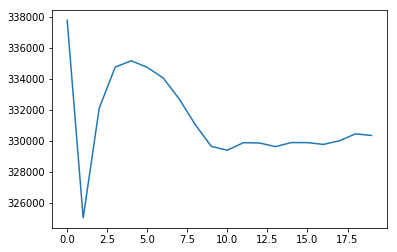

In [253]:
plt.plot(cost_list_1)

In [189]:
vectorlist_2, cost_list_2 = k_means(data, 10, 20, list2)

In [190]:
value_list2 = centerpair(vectorlist_2)
value_list2

[[0.0,
  15760.12247224593,
  14110.83439088334,
  9045.320234552391,
  5567.684524118405,
  1924.6240815733208,
  1100.8590503593293,
  402.89054961102926,
  2105.44257559296,
  3169.003772849924],
 [0.0,
  11524.505650179837,
  6743.884100192459,
  10192.525007384162,
  14455.11937212132,
  14682.450992891092,
  15362.417960805125,
  13674.707531226235,
  12597.039559531104],
 [0.0,
  9545.879403387184,
  10883.382187801386,
  12233.959804503613,
  13208.002933714424,
  13786.484182516106,
  12508.95738096874,
  11938.376127029482],
 [0.0,
  3494.222415571812,
  7718.222009696625,
  7957.775949135466,
  8644.807041005526,
  6947.820636329125,
  5876.33019960587],
 [0.0,
  4404.562590797219,
  4492.45821436027,
  5169.937291125641,
  3488.1585187816186,
  2407.9187944858027],
 [0.0,
  1182.864189045907,
  1615.788236139292,
  1313.3274934048693,
  2153.7714717523963],
 [0.0, 698.488135927792, 1010.1976652126838, 2085.460676407295],
 [0.0, 1702.7926583344843, 2768.6077191659247],
 [0.0

In [191]:
cost_list_2

[883129.688222908,
 726635.4740051996,
 666402.3816301943,
 630806.0664527973,
 610939.5161235236,
 592419.7439672151,
 573464.9289354456,
 545762.4980263152,
 520616.0612161843,
 502042.5288674065,
 486738.6330786807,
 476413.2017257709,
 467456.15583595226,
 460202.82061518374,
 454352.6141763577,
 450119.48478978797,
 447187.17380503076,
 444394.4755539355,
 441890.2318591882,
 440396.2249176502]

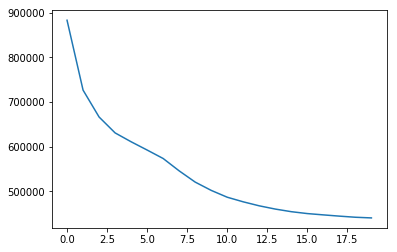

In [192]:
plt.plot(cost_list_2)

In [193]:
def k_means_M(dataset, k, iteration, vectors):    
    labels = []
    for i in range(len(dataset)):
        labels.append(-1)
    cost_list = []    
    while(iteration > 0):
        C = []
        for i in range(k):
            C.append([])
        for labelIndex, item in enumerate(dataset):
            classIndex = -1
            minDist = 1e6
            for i, point in enumerate(vectors):
                #更換計算距離方式
                dist = getManhattan(item, point)
                if(dist < minDist):
                    classIndex = i
                    minDist = dist
            C[classIndex].append(item)
            labels[labelIndex] = classIndex
        for i, cluster in enumerate(C):
            clusterHeart = []
            dimension = len(dataset[0])
            for j in range(dimension):
                clusterHeart.append(0)
            for item in cluster:
                for j, coordinate in enumerate(item):
                    clusterHeart[j] += coordinate / len(cluster)
            vectors[i] = clusterHeart
        
        cost = 0
        for i, center in enumerate(labels):
            cost+=getManhattan(dataset[i], vectors[center])
        cost_list.extend([cost])
        iteration -= 1
    return cost_list, vectors

In [217]:
cost_list_3, vectorlist_3 = k_means_M(data, 10, 20, list1)

In [218]:
vectorlist_3

[[0.1512946428571428,
  0.21660714285714294,
  0.4275892857142861,
  0.25924107142857145,
  0.31834821428571447,
  0.13919642857142853,
  0.07598214285714283,
  0.17138392857142862,
  0.3770982142857145,
  0.5587500000000005,
  0.10357142857142856,
  0.6560267857142859,
  0.14000000000000004,
  0.15370535714285719,
  0.17928571428571421,
  0.2490625000000001,
  0.13749999999999998,
  0.35709821428571453,
  1.6295089285714282,
  0.21982142857142853,
  1.2336160714285713,
  0.5389732142857142,
  0.17767857142857144,
  0.18620535714285724,
  0.42624999999999996,
  0.13973214285714283,
  0.027991071428571428,
  0.023035714285714284,
  0.006160714285714286,
  0.024151785714285712,
  0.023169642857142857,
  0.0019642857142857144,
  0.08745535714285717,
  0.0028125000000000003,
  0.10276785714285716,
  0.026428571428571426,
  0.12808035714285712,
  0.005267857142857143,
  0.0225,
  0.03142857142857143,
  0.0069642857142857145,
  0.06544642857142857,
  0.013437499999999998,
  0.011741071428571

In [219]:
vectorlist_3 = centerpair(vectorlist_3)
vectorlist_3

[[0.0,
  2219.177277050987,
  9948.044077639335,
  528.6997575475609,
  413.36506120711607,
  827.7188856579817,
  681.0349895443139,
  917.127382961168,
  832.1474343052383,
  729.0563485517984],
 [0.0,
  7767.945602579569,
  2734.0498544640427,
  2628.4908097297644,
  3044.477872125274,
  2898.712893932663,
  3133.460130173687,
  1812.4545744763482,
  1491.3573457511582],
 [0.0,
  10433.061351319797,
  10361.367486044566,
  10773.530838116945,
  10626.48859681842,
  10862.965776276442,
  9340.27523217026,
  9236.84002169792],
 [0.0,
  221.37279398782283,
  375.1561884837033,
  249.37918826549193,
  457.259652554347,
  1156.583375793985,
  1251.1583460671177],
 [0.0,
  415.9899852468607,
  270.7487915777594,
  505.0710666133787,
  1171.9642058961383,
  1137.135265913955],
 [0.0,
  147.04697388149478,
  89.49091655241023,
  1529.4640115204093,
  1553.1238066646663],
 [0.0, 236.51462239245387, 1391.5504211467135, 1407.4044002671749],
 [0.0, 1613.555789411285, 1642.1286873773315],
 [0.0,

In [220]:
cost_list_3

[490282.052353507,
 481377.56059820455,
 492600.81386881124,
 496543.91221865197,
 494256.10804948205,
 490294.86388389533,
 482043.1477034066,
 484692.9533934697,
 480634.66713794216,
 458435.4334465881,
 453853.6575161885,
 454472.54237257945,
 454929.1641861643,
 454547.43204789906,
 455667.63898723834,
 455922.23933521437,
 454015.3182839018,
 454196.38876224996,
 451948.60045401985,
 449328.71305669623]

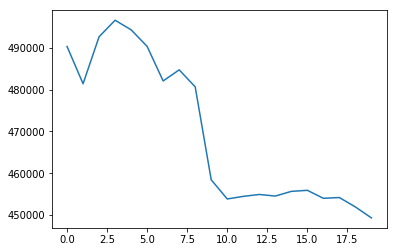

In [221]:
plt.plot(cost_list_3)

In [213]:
cost_list_4, vectorlist_4 = k_means_M(data, 10, 20, list2)

In [214]:
vectorlist_4 = centerpair(vectorlist_4)
vectorlist_4

[[0.0,
  15747.234225995131,
  14100.144687804226,
  9032.333022974995,
  5554.7866933828445,
  2006.7026683699507,
  1338.161125522521,
  514.6270375393652,
  1571.2434198098981,
  3022.6608840606814],
 [0.0,
  11524.505650179837,
  6743.884100192459,
  10192.525007384162,
  14474.554115568231,
  14412.056615494354,
  15239.87707116475,
  14328.226191823098,
  12731.397634823861],
 [0.0,
  9545.879403387184,
  10883.382187801386,
  12167.793871387044,
  13125.351004065811,
  13684.606757319763,
  12643.985638343242,
  12006.39461776129],
 [0.0,
  3494.222415571812,
  7742.628117271345,
  7694.276701483226,
  8521.197863130885,
  7588.404540222491,
  6009.820222838375],
 [0.0,
  4452.971684507903,
  4219.760574098205,
  5047.516256062293,
  4167.636533016606,
  2542.5693542004565],
 [0.0,
  1405.109080333076,
  1637.7294382123864,
  910.9943878357353,
  2124.263362351727],
 [0.0, 827.8406580149789, 566.5510174100826, 1684.5160118550446],
 [0.0, 1081.379334824019, 2511.4588586712234],
 

In [215]:
cost_list_4

[1127495.397939767,
 1003751.3511087272,
 907015.9816038065,
 869217.6109899584,
 848322.5780149932,
 831494.9853091373,
 809900.1592853427,
 767604.2335874847,
 721820.0579390874,
 696413.189877527,
 685435.8615397915,
 675391.1397815685,
 667744.9061708375,
 663774.3350357212,
 660398.8843583972,
 656473.8155114749,
 653205.5325790346,
 651272.0317451626,
 649818.7450545946,
 646820.1243524597]

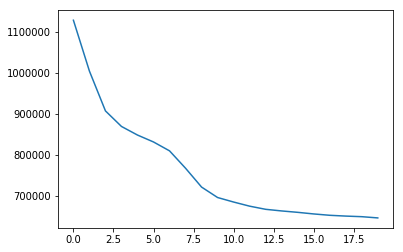

In [216]:
plt.plot(cost_list_4)